<a href="https://colab.research.google.com/github/Joyschool/2025_mirae_master/blob/main/2%EC%9D%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5_%ED%83%90%EC%83%89%EC%A0%81%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2일차 탐색적 데이터 분석

- (코랩에서) 한글폰트 설치하기

In [7]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 런타입 > 세션 다시 시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,597 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126284 files and dire

## 1.ChatGPT로 데이터 분석하기
- 주제: **서울시 지하철호선별 역별 승하차 인원 데이터 분석**
- 데이터 출처: https://data.seoul.go.kr/dataList/OA-12914/S/1/datasetView.do
- 데이터 사용: **2025년 6월 데이터**


### 1-1.Prompt
이 문서의 내용을 이해하기 쉽도록 그래프와 대표값을 이용하여 데이터 분석을 해줘.

In [2]:
import pandas as pd

# Load the uploaded CSV file
file_path = "CARD_SUBWAY_MONTH_202506 (1).csv"
df = pd.read_csv(file_path, index_col=False)

# Display the first few rows to understand the structure
df.head()  # 앞에서 5개 데이터 보여줘.

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20250601,6호선,창신,1935,1697,20250604
1,20250601,2호선,사당,28256,30084,20250604
2,20250601,일산선,원당,7351,7160,20250604
3,20250601,2호선,방배,7845,7979,20250604
4,20250601,2호선,서초,14905,14759,20250604


In [3]:
# 하차 인원 이상치 탐색: 최대값 확인
max_alighting = df['하차총승객수'].max()

# 상위 몇 개의 이상치 값이 있는지 확인
df[df['하차총승객수'] > 1e7].sort_values(by='하차총승객수', ascending=False).head()


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자




---



## 2.Gemini로 데이터 분석하기


--- Key Representative Values ---
Number of unique days in the data: 30 days
Overall average daily total passengers across all stations: 13,829,793 passengers
Overall average daily total passengers *per station*: 26,143 passengers/station
Average daily total rides (승차총승객수) across all stations: 6,930,290 passengers
Average daily total alights (하차총승객수) across all stations: 6,899,503 passengers

--- Top 10 Busiest Stations (Total Passengers in June 2025) ---
서울역: 6,539,102 total passengers
잠실(송파구청): 5,656,887 total passengers
홍대입구: 5,579,498 total passengers
고속터미널: 5,040,586 total passengers
강남: 4,394,364 total passengers
사당: 4,024,084 total passengers
선릉: 3,702,621 total passengers
신림: 3,322,696 total passengers
가산디지털단지: 3,253,927 total passengers
구로디지털단지: 3,174,292 total passengers

--- Top 10 Busiest Stations (Average Daily Passengers in June 2025) ---
서울역: 217,970 average daily passengers
잠실(송파구청): 188,563 average daily passengers
홍대입구: 185,983 average daily passengers
고속터미널: 168,020

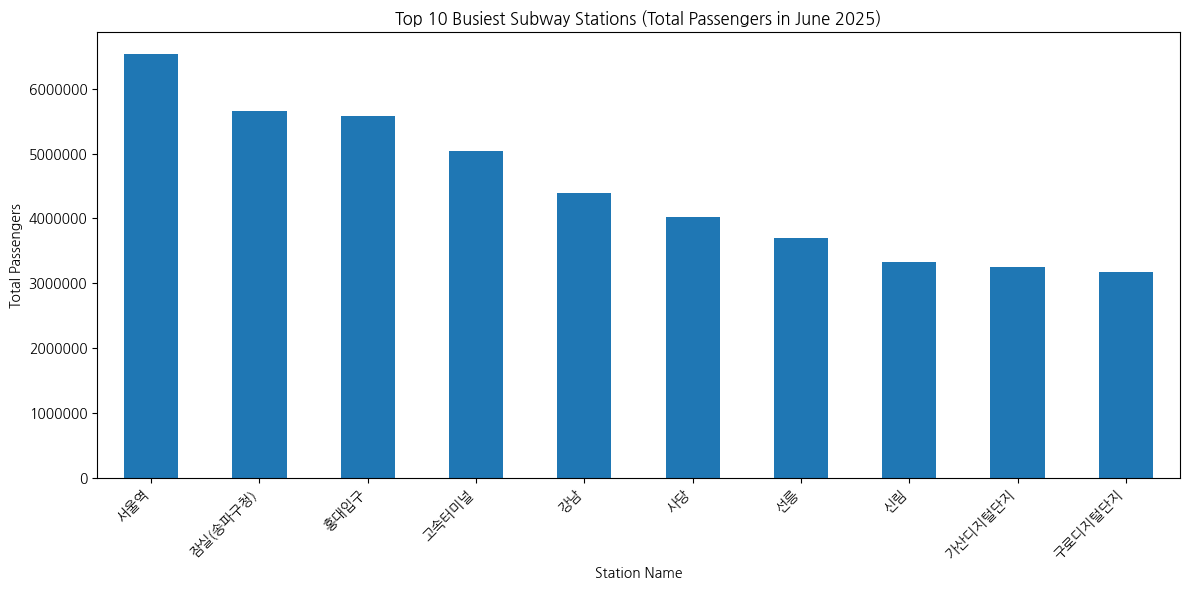

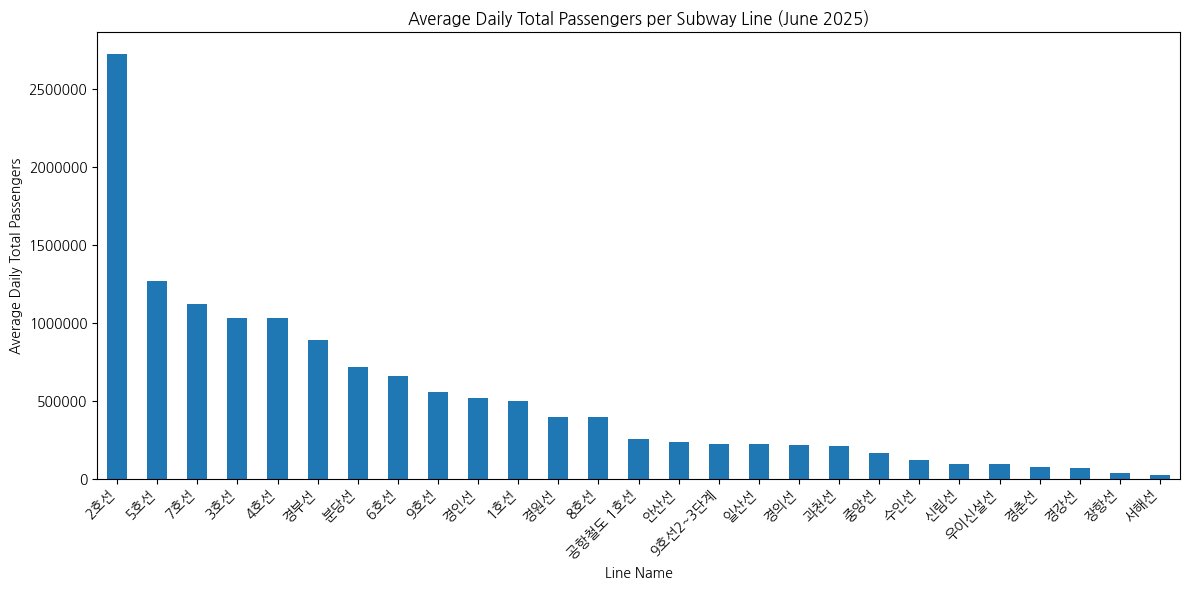

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# 한글 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# matplotlib에서 기본 폰트로 지정
plt.rcParams['font.family'] = 'NanumGothic'


# Load the CSV file
df = pd.read_csv(file_path, index_col=False)

# Convert relevant columns to numeric, coercing errors to NaN
# '승차총승객수' (Total Boarding Passengers)와 '하차총승객수' (Total Alighting Passengers)를 숫자로 변환합니다.
# 변환 중 오류가 발생하면 해당 값을 NaN (Not a Number)으로 처리합니다.
df['승차총승객수'] = pd.to_numeric(df['승차총승객수'], errors='coerce')
df['하차총승객수'] = pd.to_numeric(df['하차총승객수'], errors='coerce')

# Drop rows where '승차총승객수' or '하차총승객수' are NaN (due to coercion errors)
# 숫자로 변환되지 않은 (NaN이 된) 행을 제거하여 정확한 계산을 보장합니다.
df.dropna(subset=['승차총승객수', '하차총승객수'], inplace=True)

# Calculate total passengers for each station
# 각 역의 총 승객수를 계산합니다.
df['총승객수'] = df['승차총승객수'] + df['하차총승객수']

# Group by station name and sum the total passengers, then sort
# 역명별로 그룹화하여 총 승객수를 합산하고, 내림차순으로 정렬합니다.
station_total_passengers = df.groupby('역명')['총승객수'].sum().sort_values(ascending=False)

# Get the top 10 busiest stations
# 가장 혼잡한 상위 10개 역을 추출합니다.
top_10_stations = station_total_passengers.head(10)

# Calculate the number of unique days in the data
# 데이터에 포함된 고유한 사용일수를 계산합니다.
num_unique_days = df['사용일자'].nunique()

# Calculate average daily passengers per station for the top 10
# 상위 10개 역의 일평균 총 승객수를 계산합니다.
avg_daily_passengers_top_10 = top_10_stations / num_unique_days

# Calculate overall average daily passengers per station
# 모든 역의 역당 일평균 총 승객수를 계산합니다.
overall_avg_daily_passengers_per_station = df.groupby('역명')['총승객수'].sum().mean() / num_unique_days

# Calculate overall average daily total passengers (sum of all stations / num_unique_days)
# 전체 역의 일평균 총 승객수를 계산합니다.
overall_total_daily_passengers = df['총승객수'].sum() / num_unique_days

# Calculate average daily ridership (승차총승객수) for all stations combined
# 전체 역의 일평균 승차 승객수를 계산합니다.
avg_daily_rides = df['승차총승객수'].sum() / num_unique_days

# Calculate average daily alighting (하차총승객수) for all stations combined
# 전체 역의 일평균 하차 승객수를 계산합니다.
avg_daily_alights = df['하차총승객수'].sum() / num_unique_days

# Calculate the average total daily passengers per station line
# 각 노선별 일평균 총 승객수를 계산합니다.
avg_daily_passengers_per_line = df.groupby('노선명')['총승객수'].sum() / num_unique_days

# Calculate the average daily number of passengers (승차총승객수, 하차총승객수) per line
# 각 노선별 일평균 승차 승객수와 하차 승객수를 계산합니다.
avg_daily_ride_line = df.groupby('노선명')['승차총승객수'].sum() / num_unique_days
avg_daily_alight_line = df.groupby('노선명')['하차총승객수'].sum() / num_unique_days

# Plotting the top 10 busiest stations
# 가장 혼잡한 상위 10개 역의 막대 그래프를 생성하고 저장합니다.
plt.figure(figsize=(12, 6))
top_10_stations.plot(kind='bar')
plt.title('Top 10 Busiest Subway Stations (Total Passengers in June 2025)')
plt.xlabel('Station Name')
plt.ylabel('Total Passengers')
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d')) # y축 레이블을 정수로 표시
plt.xticks(rotation=45, ha='right') # x축 레이블 회전
plt.tight_layout() # 그래프 요소들이 겹치지 않도록 자동 조정
plt.savefig('top_10_busiest_stations.png') # 그래프를 이미지 파일로 저장

# Plotting average daily passengers per line
# 노선별 일평균 총 승객수의 막대 그래프를 생성하고 저장합니다.
plt.figure(figsize=(12, 6))
avg_daily_passengers_per_line.sort_values(ascending=False).plot(kind='bar') # 내림차순으로 정렬하여 플로팅
plt.title('Average Daily Total Passengers per Subway Line (June 2025)')
plt.xlabel('Line Name')
plt.ylabel('Average Daily Total Passengers')
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d')) # y축 레이블을 정수로 표시
plt.xticks(rotation=45, ha='right') # x축 레이블 회전
plt.tight_layout() # 그래프 요소들이 겹치지 않도록 자동 조정
plt.savefig('avg_daily_passengers_per_line.png') # 그래프를 이미지 파일로 저장

# Print key representative values
# 계산된 주요 대표값들을 출력합니다.
print("\n--- Key Representative Values ---")
print(f"Number of unique days in the data: {num_unique_days} days")
print(f"Overall average daily total passengers across all stations: {overall_total_daily_passengers:,.0f} passengers")
print(f"Overall average daily total passengers *per station*: {overall_avg_daily_passengers_per_station:,.0f} passengers/station")
print(f"Average daily total rides (승차총승객수) across all stations: {avg_daily_rides:,.0f} passengers")
print(f"Average daily total alights (하차총승객수) across all stations: {avg_daily_alights:,.0f} passengers")

print("\n--- Top 10 Busiest Stations (Total Passengers in June 2025) ---")
for station, passengers in top_10_stations.items():
    print(f"{station}: {passengers:,.0f} total passengers")

print("\n--- Top 10 Busiest Stations (Average Daily Passengers in June 2025) ---")
for station, avg_passengers in avg_daily_passengers_top_10.items():
    print(f"{station}: {avg_passengers:,.0f} average daily passengers")

print("\n--- Average Daily Passengers per Subway Line (June 2025) ---")
for line, avg_passengers in avg_daily_passengers_per_line.sort_values(ascending=False).items():
    print(f"{line}: {avg_passengers:,.0f} total passengers (Avg Daily)")

print("\n--- Average Daily Rides (승차) per Subway Line (June 2025) ---")
for line, avg_rides in avg_daily_ride_line.sort_values(ascending=False).items():
    print(f"{line}: {avg_rides:,.0f} rides (Avg Daily)")

print("\n--- Average Daily Alights (하차) per Subway Line (June 2025) ---")
for line, avg_alights in avg_daily_alight_line.sort_values(ascending=False).items():
    print(f"{line}: {avg_alights:,.0f} alights (Avg Daily)")